In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import datetime

test_df = pd.read_csv(r'C:\Users\freja\Downloads\restaurant-revenue-prediction\test.csv\test.csv')
train_df = pd.read_csv(r'C:\Users\freja\Downloads\restaurant-revenue-prediction\train.csv\train.csv')

In [2]:
train_df.shape

(137, 43)

In [3]:
test_df.shape

(100000, 42)

In [4]:
train_df.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [5]:
#to see all the columns in output
pd.set_option('display.max_columns', None)
train_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


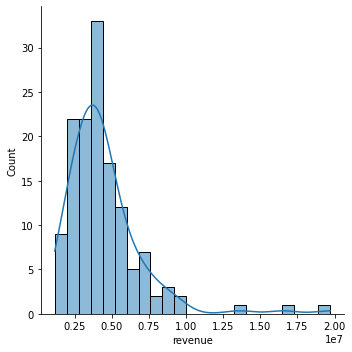

In [6]:
sns.displot(train_df['revenue'],kde=True)

In [7]:
#remove outliers
train_df = train_df[train_df['revenue']<8e+06].copy()

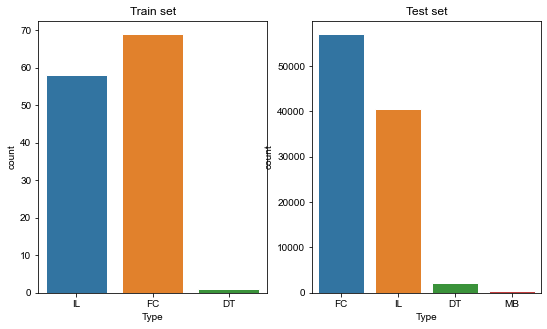

In [8]:
fig,ax = plt.subplots(1,2,figsize=(9,5))
sns.set_style('darkgrid')
sns.countplot(train_df.Type,ax=ax[0])
ax[0].set_title('Train set')
sns.countplot(test_df.Type,ax=ax[1])
ax[1].set_title('Test set');

In [9]:
#Create a checkpoint so that we can easily access original dataset
df = pd.concat([train_df,test_df],axis=0)

# Extracting month and year from date column
df['Open Date'] = pd.to_datetime(df['Open Date'])
df['launch_Month'] = [x.month for x in df['Open Date']]
df['launch_year'] = [x.year for x in df['Open Date']]
df.drop(['Id','Open Date'],axis=1,inplace=True)

Text(0.5, 1.0, 'Month-wise no of launches')

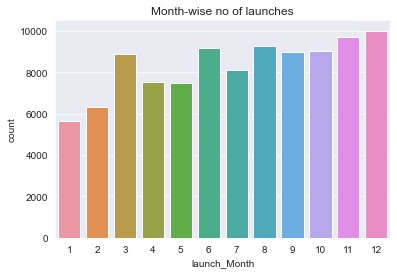

In [10]:
sns.countplot(df['launch_Month'])
plt.title('Month-wise no of launches')

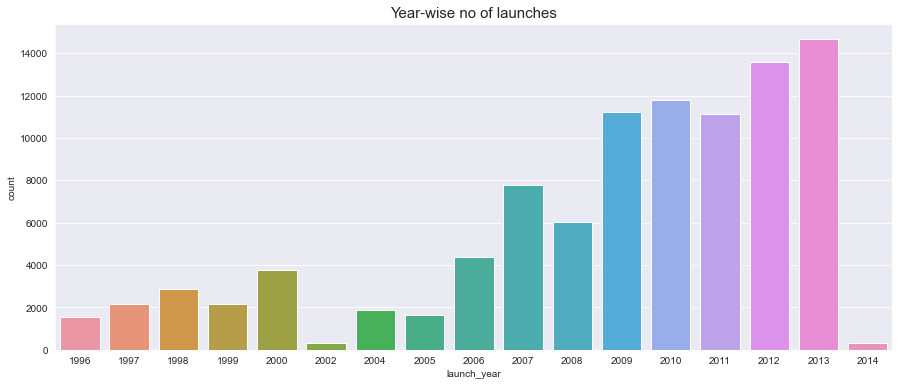

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(df['launch_year'],order=[1996,1997,1998,1999,2000,2002,2004,2005,2006,
                                       2007,2008,2009,2010,2011,2012,2013,2014])
plt.title('Year-wise no of launches',fontsize=15);

In [12]:
#preprocessing data
df['Type'].value_counts()

FC    57088
IL    40505
DT     2245
MB      290
Name: Type, dtype: int64

In [13]:
df['City Group'].value_counts()

Other         50787
Big Cities    49341
Name: City Group, dtype: int64

In [14]:
df['City'].value_counts()
#There are 63 different values and it would be better to create dummy variables to handle this feature.

İstanbul    34130
Ankara       8739
İzmir        6472
Antalya      5915
Kocaeli      4365
            ...  
Osmaniye        1
Elazığ          1
Karabük         1
Amasya          1
Tokat           1
Name: City, Length: 63, dtype: int64

In [15]:
df.drop('City',axis=1,inplace=True)

In [16]:
#converting other categorical columns
df['Type'] = df['Type'].map({'FC':0,'IL':1,'DT':2,'MB':3})

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['City Group'] = encoder.fit_transform(np.array(df['City Group']).reshape(-1,1))
df['City Group'] = df['City Group'].apply(int)

In [17]:
df.dropna().groupby('launch_Month')['revenue'].mean()

launch_Month
1     4.521243e+06
2     4.189109e+06
3     3.477052e+06
4     3.749950e+06
5     3.657800e+06
6     3.776214e+06
7     3.458596e+06
8     3.883020e+06
9     4.526998e+06
10    4.056980e+06
11    4.403934e+06
12    3.720047e+06
Name: revenue, dtype: float64

In [18]:
df.groupby('launch_year')['revenue'].mean()

launch_year
1995             NaN
1996    3.903884e+06
1997    4.286645e+06
1998    4.251905e+06
1999    5.246965e+06
2000    7.495092e+06
2001             NaN
2002    4.991022e+06
2003             NaN
2004    3.482435e+06
2005    3.298470e+06
2006    3.360841e+06
2007    4.317164e+06
2008    4.588214e+06
2009    4.094408e+06
2010    4.383878e+06
2011    4.147879e+06
2012    3.540404e+06
2013    2.532287e+06
2014    2.464944e+06
Name: revenue, dtype: float64

In [19]:
# creating dummy variables
df.launch_year = df.launch_year.astype(str)
df.launch_Month = df.launch_Month.astype(str)
year_dummy = pd.get_dummies(df[['launch_year','launch_Month']],drop_first=True)
df = pd.concat([df,year_dummy],axis=1)
df.drop(['launch_year','launch_Month'],axis=1, inplace=True)
df.shape

(100128, 70)

In [20]:
# Re-splitting train and test data
processed_df = df.dropna(axis=0)
processed_test_data = df[128:].drop('revenue',axis=1)
# remember there were 137 rows in train data
processed_df.shape

(128, 70)

In [21]:
processed_test_data.shape

(100000, 69)

In [22]:
processed_df.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,launch_year_1996,launch_year_1997,launch_year_1998,launch_year_1999,launch_year_2000,launch_year_2001,launch_year_2002,launch_year_2003,launch_year_2004,launch_year_2005,launch_year_2006,launch_year_2007,launch_year_2008,launch_year_2009,launch_year_2010,launch_year_2011,launch_year_2012,launch_year_2013,launch_year_2014,launch_Month_10,launch_Month_11,launch_Month_12,launch_Month_2,launch_Month_3,launch_Month_4,launch_Month_5,launch_Month_6,launch_Month_7,launch_Month_8,launch_Month_9
0,0,1,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,1,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,1,1,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,1,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [23]:
from sklearn.model_selection import train_test_split
X=processed_df.drop('revenue',axis=1)
y=df['revenue'][:128]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=12345)

In [24]:
X.shape

(128, 69)

In [25]:
y.shape

(128,)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

regressors = {
    'Linear Regression' : LinearRegression(),
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(),
    'K-nearest Neighbors' : KNeighborsRegressor(),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    func.fit(X_train,y_train)
    pred = func.predict(X_test)
    results.loc[method]= [mean_absolute_error(y_test,pred),
                          mean_squared_error(y_test,pred),
                          r2_score(y_test,pred)
                         ]
results


,MAE,MSE,R2-score
Linear Regression,1.904764e+06,5.764211e+12,-1.274732
Logistic Regression,1.302039e+06,2.478689e+12,0.021835
Decision Tree,1.514511e+06,3.348258e+12,-0.321323
Random Forest,1.175797e+06,2.119193e+12,0.163702
Support Vector Machines,1.407327e+06,2.555855e+12,-0.008618
K-nearest Neighbors,1.138622e+06,1.816654e+12,0.283094
XGBoost,1.057680e+06,1.946986e+12,0.231661
